In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('penguins')

| Column Name       | Description                                 | Data Type     |
|-------------------|---------------------------------------------|---------------|
| species           | Type of penguin                             | Categorical   |
| island            | Island where the penguin was observed       | Categorical   |
| bill_length_mm    | Length of the penguin's bill (in mm)        | Float         |
| bill_depth_mm     | Depth of the penguin's bill (in mm)         | Float         |
| flipper_length_mm | Length of the penguin's flipper (in mm)     | Float         |
| body_mass_g       | Body mass of the penguin (in grams)         | Float         |
| sex               | Sex of the penguin                          | Categorical   |


<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

In [3]:
df.shape

(344, 7)

In [4]:
display(df.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


None

In [6]:
display("Missing values columns")
display(df.isna().sum())

'Missing values columns'

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
display("Percentage of missing values")
display(df.isna().sum()/len(df['species'])*100)

'Percentage of missing values'

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [8]:
cleaned_df = df.dropna()

In [9]:
cleaned_df.duplicated().sum()

0

In [10]:
display("Percentage data loss after cleaning")
display(100 - ((len(cleaned_df)/len(df))*100))

'Percentage data loss after cleaning'

3.197674418604649

In [11]:
df = cleaned_df

In [12]:
mem_usage_before = df.memory_usage(deep=True)

In [13]:
df['species'] = df['species'].astype('category')
df['sex'] = df['sex'].astype('category')
df['island'] = df['island'].astype('category')

In [14]:
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')

In [15]:
df_num = df.select_dtypes(exclude=['category'])
df_cat = df.select_dtypes(include=['category'])

display(df_num.describe().T)
display(df_cat.describe().T)

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992794,5.468669,32.099998,39.5,44.500000,48.599998,59.599998
bill_depth_mm,333.0,17.164865,1.969235,13.100000,15.6,17.299999,18.700001,21.500000
flipper_length_mm,333.0,200.966965,14.015767,172.000000,190.0,197.000000,213.000000,231.000000
body_mass_g,333.0,4207.057129,805.215820,2700.000000,3550.0,4050.000000,4775.000000,6300.000000


,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,Male,168


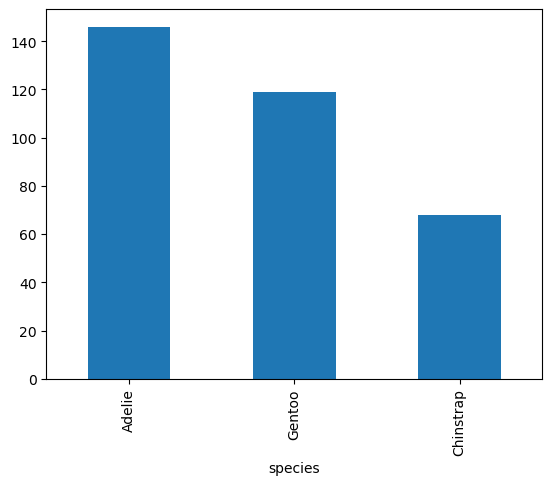

In [16]:
plt.figure()
df['species'].value_counts().plot.bar()
plt.show()

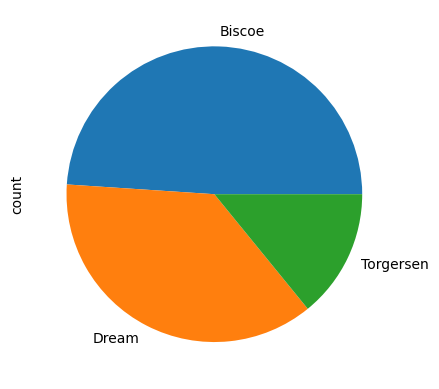

In [17]:
plt.figure()
df['island'].value_counts().plot.pie()
plt.show()

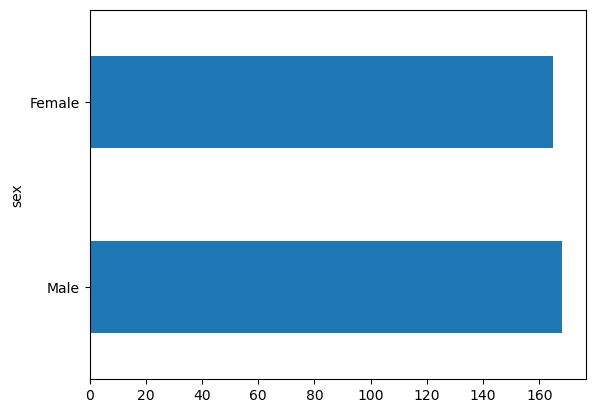

In [18]:
plt.figure()
df['sex'].value_counts().plot.barh()
plt.show()

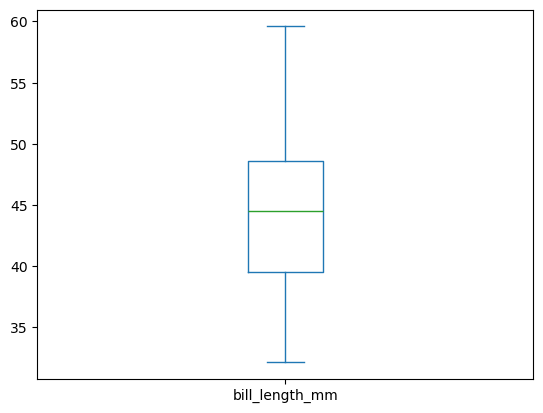

In [19]:
plt.figure()
df['bill_length_mm'].plot.box()
plt.show()

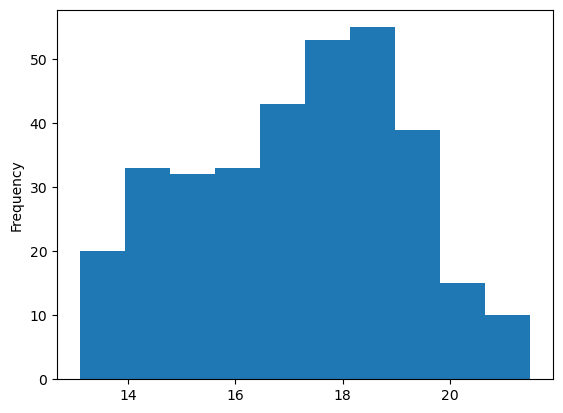

In [20]:
plt.figure()
df['bill_depth_mm'].plot.hist()
plt.show()

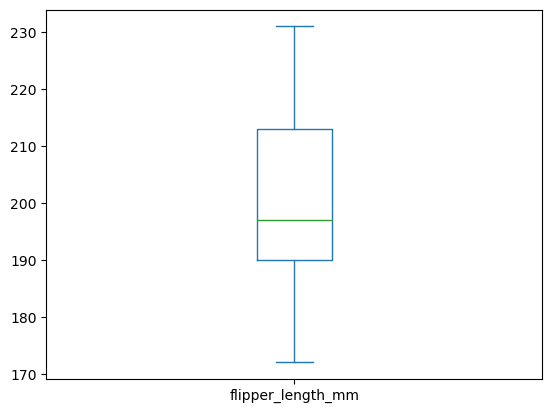

In [21]:
plt.figure()
df['flipper_length_mm'].plot.box()
plt.show()

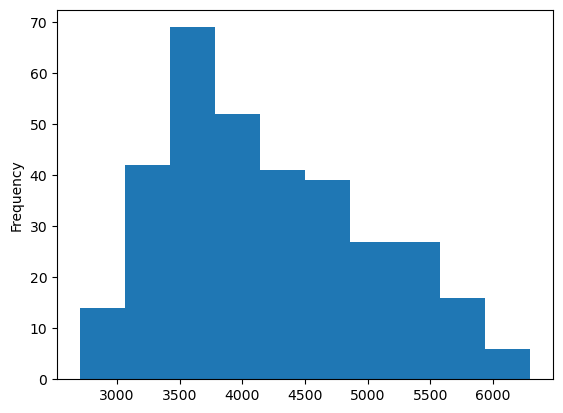

In [22]:
plt.figure()
df['body_mass_g'].plot.hist()
plt.show()

<Axes: >

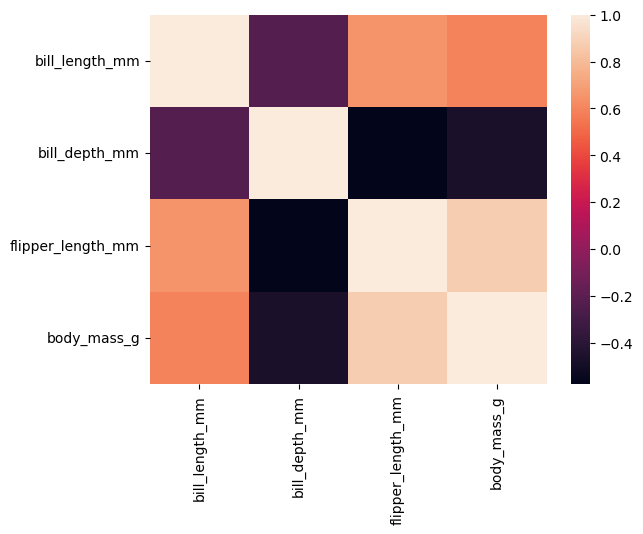

In [23]:
corr = df_num.corr()

sns.heatmap(corr)

In [24]:
df['bill_size'] = df['bill_length_mm'] * df['bill_depth_mm']

df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

<Axes: >

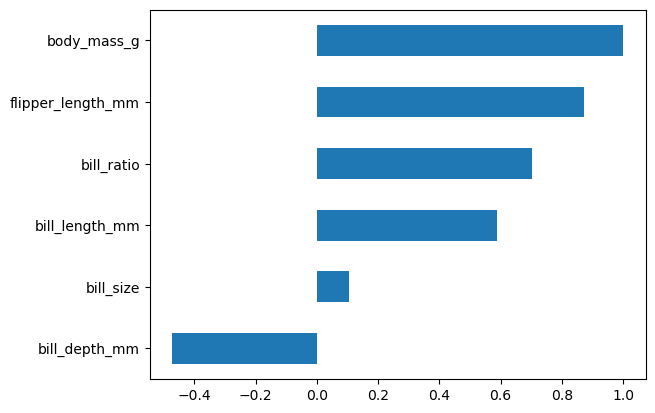

In [25]:
df_num = df.select_dtypes(exclude=['category'])
corr = df_num.corr()

corr['body_mass_g'].sort_values().plot.barh()

## Summary of Findings
This analysis explores the characteristics and relationships of various features within the Palmer Penguins dataset. The key findings from our exploratory data analysis (EDA) are:

#### Dataset Composition:
- The dataset includes various features such as species, island, bill length, bill depth, flipper length, and body mass.
Missing values were present but handled by dropping rows with missing data.
#### Data Distribution:
- The species distribution shows a higher count of Adelie penguins compared to other species.
The island distribution indicates a majority of penguins are from Dream Island.
The sex distribution is relatively balanced between male and female penguins.
Bill length, bill depth, flipper length, and body mass are visualized to understand their distributions and identify any potential outliers.
#### Correlations:
- Correlation analysis reveals significant relationships between numerical features.
Body mass shows varying degrees of correlation with other features, indicating potential predictive relationships.